In [1]:
# Importing the necessary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow_addons.layers import InstanceNormalization
from tensorflow.keras.layers import LeakyReLU

2021-11-07 16:08:34.484538: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Declaring the constants

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2021-11-07 16:08:35.694485: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-07 16:08:35.738686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 16:08:35.739404: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:2d:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-11-07 16:08:35.739424: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-11-07 16:08:35.741447: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-07 16:08:35.741488: I tensorflow/stream_executor/platform/

In [19]:
image = "../DATA/testing_image/Venice-Beach-2.jpg"

In [20]:
'''test_image = tf.data.Dataset.list_files(image)

def parse_image(filename):

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [config.IMG_HEIGHT, config.IMG_WIDTH])
  return image

test_image = test_image.map(parse_image)'''

'test_image = tf.data.Dataset.list_files(image)\n\ndef parse_image(filename):\n\n  image = tf.io.read_file(filename)\n  image = tf.image.decode_jpeg(image, channels=3)\n  image = tf.image.convert_image_dtype(image, tf.float32)\n  image = tf.image.resize(image, [config.IMG_HEIGHT, config.IMG_WIDTH])\n  return image\n\ntest_image = test_image.map(parse_image)'

In [21]:
test_image = Image.open(image).convert("RGB").resize((256, 256))

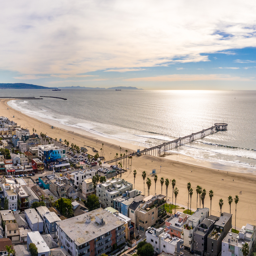

In [22]:
test_image

In [23]:
test_image_arr = np.array(test_image)

In [24]:
#test_image_arr = (test_image_arr/127.5) - 1

In [25]:
test_image_arr = test_image_arr.reshape((1, 256, 256, 3))

In [26]:
test_image_arr

array([[[[223, 218, 224],
         [223, 218, 224],
         [222, 218, 224],
         ...,
         [252, 248, 245],
         [251, 247, 244],
         [252, 248, 246]],

        [[222, 217, 223],
         [222, 217, 223],
         [221, 217, 223],
         ...,
         [252, 249, 246],
         [251, 247, 244],
         [251, 247, 244]],

        [[221, 216, 222],
         [221, 216, 222],
         [222, 217, 222],
         ...,
         [253, 249, 246],
         [252, 248, 245],
         [251, 247, 244]],

        ...,

        [[ 11,  20,  30],
         [  5,  13,  26],
         [ 74,  73,  85],
         ...,
         [ 58,  67,  42],
         [ 90,  91,  53],
         [ 83,  84,  49]],

        [[ 49,  44,  45],
         [ 35,  39,  43],
         [ 83,  87, 100],
         ...,
         [ 39,  39,  26],
         [ 84,  83,  51],
         [ 83,  85,  51]],

        [[ 63,  55,  56],
         [111, 105, 108],
         [175, 165, 165],
         ...,
         [ 43,  45,  30],
        

In [27]:
generator_g = tf.keras.models.load_model("../models/generator_g.h5")

In [28]:
def generate_images(model, test_image):
    predicted = model(test_image)

    plt.figure(figsize=(12,12))
    display_list = [test_image[0], predicted[0]]
    title = ['Test Image', 'Predicted Image']

    plt.subplot(1, 2, 1)
    plt.title(title[0])
    plt.imshow(display_list[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title[1])
    plt.imshow(display_list[1] * 0.5 + 0.5)
    plt.axis('off')

    plt.show()

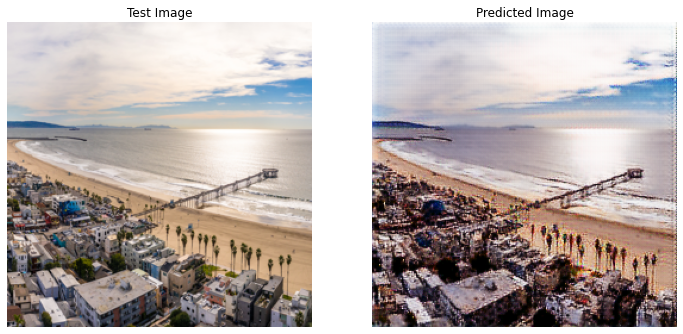

In [29]:
generate_images(generator_g, test_image_arr)